In [1]:
# In this exercise, we want to make box plots of the salary for demanded job professions.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

data = load_dataset("lukebarousse/data_jobs")
df = data['train'].to_pandas()

df = df.drop_duplicates().copy()
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)

In [3]:
# These are the job professions for which you can generate query.

In [4]:
df.job_title_short.unique()

array(['Senior Data Engineer', 'Data Analyst', 'Data Engineer',
       'Business Analyst', 'Data Scientist', 'Machine Learning Engineer',
       'Senior Data Analyst', 'Cloud Engineer', 'Senior Data Scientist',
       'Software Engineer'], dtype=object)

In [5]:
# INPUT :

In [6]:
lst = ['Senior Data Engineer', 'Data Analyst', 'Data Engineer', 'Data Scientist', 'Senior Data Analyst', 'Senior Data Scientist']

In [7]:
# OUTPUT :

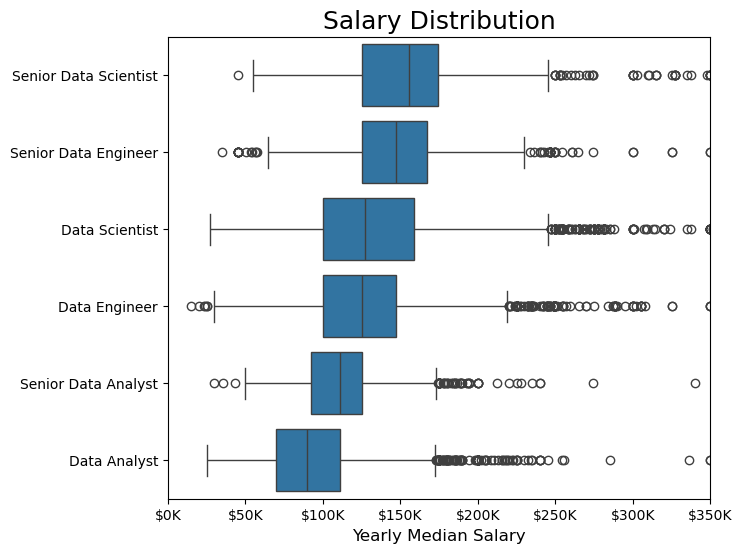

In [8]:
df_og = df.copy()

df.dropna(subset = "salary_year_avg", inplace = True)

df_clean_og = df.copy()

df = df[df['job_title_short'].isin(lst)]

order = (df.groupby(by = "job_title_short")
 .agg(median_salary = ('salary_year_avg', 'median'))
 .sort_values(by = "median_salary", ascending = False)
 .index
 )

plt.figure(figsize = (7,6))

sns.boxplot(data = df, x = 'salary_year_avg', y = 'job_title_short', order = order)
plt.xlim(0,350000)
plt.xlabel("Yearly Median Salary", fontsize = 12)
plt.ylabel("")
plt.title("Salary Distribution", fontsize = 18)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos : f"${int(x/1000)}K"))